<h2>ICS 613-50 Group Project</h2>
Sparks - Question 1 - 3<br/>
Prakat Tuladhar & Seong Kang

<strong>Set Up</strong>:
- Create a directory for the files
- Upload all the files into directory
- Load all files into RDDs
- Convert all files into DFs

In [0]:
dbutils.fs.mkdirs("dbfs:/FileStore/tables/group-project/")

Out[108]: True

In [0]:
covidRdd = sc.textFile("dbfs:/FileStore/tables/group-project/weekly_covid.csv")
aaplRdd = sc.textFile("dbfs:/FileStore/tables/group-project/AAPL.csv")
metaRdd = sc.textFile("dbfs:/FileStore/tables/group-project/META.csv")
googRdd = sc.textFile("dbfs:/FileStore/tables/group-project/GOOG.csv")

robinAaplRdd = sc.textFile("dbfs:/FileStore/tables/group-project/robin_AAPL.csv")
robinMetaRdd = sc.textFile("dbfs:/FileStore/tables/group-project/robin_FB.csv")
robinGoogRdd = sc.textFile("dbfs:/FileStore/tables/group-project/robin_GOOG.csv")

covidRddHeader = covidRdd.first()
aaplRddHeader = aaplRdd.first()
metaRddHeader = metaRdd.first()
googRddHeader = googRdd.first()
robinAaplHeader = robinAaplRdd.first()
robinMetaHeader = robinMetaRdd.first()
robinGoogHeader = robinGoogRdd.first()

covidRdd = covidRdd.filter(lambda line: line != covidRddHeader)
aaplRdd = aaplRdd.filter(lambda line: line != aaplRddHeader)
metaRdd = metaRdd.filter(lambda line: line != metaRddHeader)
googRdd = googRdd.filter(lambda line: line != googRddHeader)
robinAaplRdd = robinAaplRdd.filter(lambda line: line != robinAaplHeader)
robinMetaRdd = robinMetaRdd.filter(lambda line: line != robinMetaHeader)
robinGoogRdd = robinGoogRdd.filter(lambda line: line != robinGoogHeader)

covidRdd = covidRdd.map(lambda line: line.split(','))
aaplRdd = aaplRdd.map(lambda line: line.split(','))
metaRdd = metaRdd.map(lambda line: line.split(','))
googRdd = googRdd.map(lambda line: line.split(','))
robinAaplRdd = robinAaplRdd.map(lambda line: line.split(','))
robinMetaRdd = robinMetaRdd.map(lambda line: line.split(','))
robinGoogRdd = robinGoogRdd.map(lambda line: line.split(','))

In [0]:
from pyspark.sql.types import TimestampType, IntegerType

covidDf = covidRdd.toDF(['geography','date','weeklyCases','historicCases'])
covidDf = covidDf.select(['date', 'weeklyCases'])
aaplDf = aaplRdd.toDF(['date','open','high','low','close','adjClose','volume'])
metaDf = metaRdd.toDF(['date','open','high','low','close','adjClose','volume'])
googDf = googRdd.toDF(['date','open','high','low','close','adjClose','volume'])
robinAaplDf = robinAaplRdd.toDF(['date', 'holders'])
robinMetaDf = robinMetaRdd.toDF(['date', 'holders'])
robinGoogDf = robinGoogRdd.toDF(['date', 'holders'])

In [0]:
covidDf.limit(5).show()
aaplDf.limit(5).show()
robinGoogDf.limit(5).show()

+-----------+-----------+
|       date|weeklyCases|
+-----------+-----------+
|Nov  9 2022|     288989|
|Nov  2 2022|     273021|
|Oct 26 2022|     260772|
|Oct 19 2022|     260927|
|Oct 12 2022|     265572|
+-----------+-----------+

+----------+---------+---------+---------+---------+---------+---------+
|      date|     open|     high|      low|    close| adjClose|   volume|
+----------+---------+---------+---------+---------+---------+---------+
|2017-09-07|40.522499|40.560001|40.090000|40.314999|38.261566| 87714000|
|2017-09-08|40.215000|40.287498|39.632500|39.657501|37.637562|114446000|
|2017-09-11|40.125000|40.512501|39.972500|40.375000|38.318501|126323200|
|2017-09-12|40.652500|40.990002|39.692501|40.215000|38.166664|286856000|
|2017-09-13|39.967499|39.990002|39.477501|39.912498|37.879570|179629600|
+----------+---------+---------+---------+---------+---------+---------+

+--------------------+-------+
|                date|holders|
+--------------------+-------+
|"2018-05-02 0

<strong>Question 1:</strong> Combine the datasets for different files into a single file for Stock price database and Robinhood popularity stock.

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np

robinAaplDf = robinAaplDf.withColumn('date', F.regexp_replace('date', '"', ''))
robinAaplDf = robinAaplDf.withColumn("date", F.to_timestamp(F.col("date")))
robinAaplDateDf = robinAaplDf.select(F.date_format('date','yyyy-MM-dd').alias('date'), 'holders').groupby('date').agg(F.round(F.avg('holders'))).withColumnRenamed('round(avg(holders), 0)', 'robinhoodAaplHolders')

robinMetaDf = robinMetaDf.withColumn('date', F.regexp_replace('date', '"', ''))
robinMetaDf = robinMetaDf.withColumn("date", F.to_timestamp(F.col("date")))
robinMetaDateDf = robinMetaDf.select(F.date_format('date','yyyy-MM-dd').alias('date'), 'holders').groupby('date').agg(F.round(F.avg('holders'))).withColumnRenamed('round(avg(holders), 0)', 'robinhoodMetaHolders')

robinGoogDf = robinGoogDf.withColumn('date', F.regexp_replace('date', '"', ''))
robinGoogDf = robinGoogDf.withColumn("date", F.to_timestamp(F.col("date")))
robinGoogDateDf = robinGoogDf.select(F.date_format('date','yyyy-MM-dd').alias('date'), 'holders').groupby('date').agg(F.round(F.avg('holders'))).withColumnRenamed('round(avg(holders), 0)', 'robinhoodGoogHolders')

robinAaplDateDf.show()
robinMetaDateDf.show()
robinGoogDateDf.show()

+----------+--------------------+
|      date|robinhoodAaplHolders|
+----------+--------------------+
|2018-12-31|            215982.0|
|2018-08-23|            161550.0|
|2018-05-15|            141246.0|
|2018-12-17|            210718.0|
|2018-12-20|            210514.0|
|2019-01-17|            237134.0|
|2018-12-22|            210369.0|
|2018-05-03|            144779.0|
|2018-06-22|            149767.0|
|2018-10-10|            179740.0|
|2018-11-13|            201194.0|
|2018-12-30|            215607.0|
|2018-08-24|            161880.0|
|2018-09-27|            181240.0|
|2018-10-23|            182677.0|
|2018-11-26|            204114.0|
|2018-07-21|            150835.0|
|2018-09-15|            180483.0|
|2019-01-15|            236660.0|
|2018-05-25|            142254.0|
+----------+--------------------+
only showing top 20 rows

+----------+--------------------+
|      date|robinhoodMetaHolders|
+----------+--------------------+
|2018-12-31|            170145.0|
|2018-08-23|          

In [0]:
robinAaplMeta = robinAaplDateDf.join(robinMetaDateDf, robinMetaDateDf.date == robinAaplDateDf.date).select([robinAaplDateDf.date, robinAaplDateDf.robinhoodAaplHolders, robinMetaDateDf.robinhoodMetaHolders])

robinAaplMetaGoog = robinAaplMeta.join(robinGoogDateDf, robinGoogDateDf.date == robinAaplMeta.date).select([robinAaplMeta.robinhoodAaplHolders, robinAaplMeta.robinhoodMetaHolders, robinGoogDateDf.robinhoodGoogHolders, robinGoogDateDf.date])

robinAaplMetaGoog.show()

+--------------------+--------------------+--------------------+----------+
|robinhoodAaplHolders|robinhoodMetaHolders|robinhoodGoogHolders|      date|
+--------------------+--------------------+--------------------+----------+
|            215982.0|            170145.0|             19719.0|2018-12-31|
|            161550.0|            183041.0|             18024.0|2018-08-23|
|            141246.0|            103632.0|             16642.0|2018-05-15|
|            210718.0|            171789.0|             19683.0|2018-12-17|
|            210514.0|            170398.0|             19641.0|2018-12-20|
|            237134.0|            169244.0|             19621.0|2019-01-17|
|            210369.0|            170161.0|             19865.0|2018-12-22|
|            144779.0|            104365.0|             17237.0|2018-05-03|
|            149767.0|            102919.0|             16165.0|2018-06-22|
|            179740.0|            175240.0|             19044.0|2018-10-10|
|           

In [0]:
aaplSigDf = aaplRdd.toDF(['date','aaplOpen','aaplHigh','aaplLow','aaplClose','aaplAdjClose','aaplVolume'])
metaSigDf = metaRdd.toDF(['date','metaOpen','metaHigh','metaLow','metaClose','metaAdjClose','metaVolume'])
googSigDf = googRdd.toDF(['date','googOpen','googHigh','googLow','googClose','googAdjClose','googVolume'])

aaplMetaGoogSigDf = aaplSigDf.join(metaSigDf, metaSigDf.date == aaplSigDf.date).join(googSigDf, googSigDf.date == aaplSigDf.date).select([aaplSigDf.date, 'aaplOpen', 'aaplHigh', 'aaplLow', 'aaplClose', 'aaplAdjClose', 'aaplVolume', 'metaOpen', 'metaHigh', 'metaLow', 'metaClose', 'metaAdjClose', 'metaVolume', 'googOpen', 'googHigh', 'googLow', 'googClose', 'googAdjClose', 'googVolume'])
aaplMetaGoogSigDf.show()

+----------+---------+---------+---------+---------+------------+----------+----------+----------+----------+----------+------------+----------+---------+---------+---------+---------+------------+----------+
|      date| aaplOpen| aaplHigh|  aaplLow|aaplClose|aaplAdjClose|aaplVolume|  metaOpen|  metaHigh|   metaLow| metaClose|metaAdjClose|metaVolume| googOpen| googHigh|  googLow|googClose|googAdjClose|googVolume|
+----------+---------+---------+---------+---------+------------+----------+----------+----------+----------+----------+------------+----------+---------+---------+---------+---------+------------+----------+
|2017-12-05|42.264999|42.880001|42.099998|42.410000|   40.394554| 109400800|170.449997|175.380005|169.009995|172.830002|  172.830002|  20184900|49.797001|51.030499|49.414001|50.257500|   50.257500|  41346000|
|2019-08-08|50.049999|50.882500|49.847500|50.857498|   49.568882| 108038000|186.619995|190.339996|184.050003|190.160004|  190.160004|  14828900|59.141499|60.250500|

In [0]:
aaplMetaGoogRobin = aaplMetaGoogSigDf.alias('amg').join(robinAaplMetaGoog, robinAaplMetaGoog.date == aaplMetaGoogSigDf.date).select(['amg.*', 'robinhoodGoogHolders', 'robinhoodMetaHolders', 'robinhoodAaplHolders']).orderBy('date')
aaplMetaGoogRobin.show()

+----------+---------+---------+---------+---------+------------+----------+----------+----------+----------+----------+------------+----------+---------+---------+---------+---------+------------+----------+--------------------+--------------------+--------------------+
|      date| aaplOpen| aaplHigh|  aaplLow|aaplClose|aaplAdjClose|aaplVolume|  metaOpen|  metaHigh|   metaLow| metaClose|metaAdjClose|metaVolume| googOpen| googHigh|  googLow|googClose|googAdjClose|googVolume|robinhoodGoogHolders|robinhoodMetaHolders|robinhoodAaplHolders|
+----------+---------+---------+---------+---------+------------+----------+----------+----------+----------+----------+------------+----------+---------+---------+---------+---------+------------+----------+--------------------+--------------------+--------------------+
|2018-05-02|43.807499|44.437500|43.450001|44.142502|   42.216148| 266157600|174.250000|178.080002|174.199997|176.070007|  176.070007|  30424500|51.404999|52.019451|51.143501|51.219002|

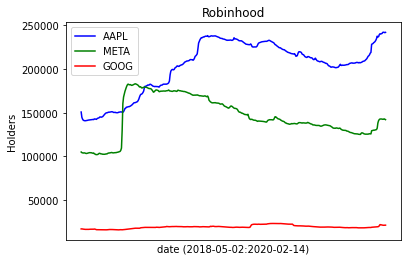

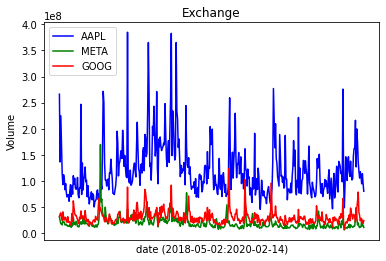

In [0]:
def getDateRange(list):
    return f"{list[0].date}:{list[len(list) - 1].date}"

aaplMetaGoogRobinList = aaplMetaGoogRobin.collect()
fig, ax = plt.subplots()
ax.plot([row.date for row in aaplMetaGoogRobinList], [row.robinhoodAaplHolders for row in aaplMetaGoogRobinList], color = 'blue', label = 'AAPL')
ax.plot([row.date for row in aaplMetaGoogRobinList], [row.robinhoodMetaHolders for row in aaplMetaGoogRobinList], color = 'green', label = 'META')
ax.plot([row.date for row in aaplMetaGoogRobinList], [row.robinhoodGoogHolders for row in aaplMetaGoogRobinList], color = 'red', label = 'GOOG')
ax.legend(loc = 'upper left')
plt.title('Robinhood')
plt.ylabel('Holders')
plt.xlabel(f"date ({getDateRange(aaplMetaGoogRobinList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

fig, ax = plt.subplots()
ax.plot([row.date for row in aaplMetaGoogRobinList], [int(row.aaplVolume) for row in aaplMetaGoogRobinList], color = 'blue', label = 'AAPL')
ax.plot([row.date for row in aaplMetaGoogRobinList], [int(row.metaVolume) for row in aaplMetaGoogRobinList], color = 'green', label = 'META')
ax.plot([row.date for row in aaplMetaGoogRobinList], [int(row.googVolume) for row in aaplMetaGoogRobinList], color = 'red', label = 'GOOG')
ax.legend(loc = 'upper left')
plt.title('Exchange')
plt.ylabel('Volume')
plt.xlabel(f"date ({getDateRange(aaplMetaGoogRobinList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

<strong>Question 2:</strong> Get the average of prices of those 3 stocks for trend and comparison.

In [0]:
aaplAvg = aaplDf.select(['date', F.round((aaplDf.high + aaplDf.low)/2,6)]).withColumnRenamed('round(((high + low) / 2), 6)', 'avgPrice')
metaAvg = metaDf.select(['date', F.round((metaDf.high + metaDf.low)/2,6)]).withColumnRenamed('round(((high + low) / 2), 6)', 'avgPrice')
googAvg = googDf.select(['date', F.round((googDf.high + googDf.low)/2,6)]).withColumnRenamed('round(((high + low) / 2), 6)', 'avgPrice')

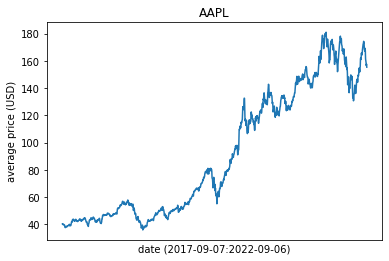

In [0]:
aaplAvgList = aaplAvg.collect()
plt.plot([row.date for row in aaplAvgList], [row.avgPrice for row in aaplAvgList])
plt.title('AAPL')
plt.ylabel('average price (USD)')
plt.xlabel(f"date ({getDateRange(aaplAvgList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

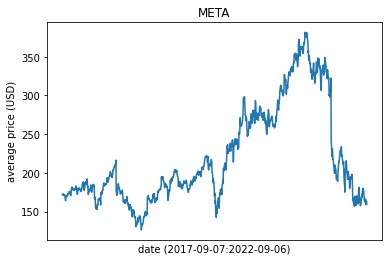

In [0]:
metaAvgList = metaAvg.collect()
plt.plot([row.date for row in metaAvgList], [row.avgPrice for row in metaAvgList])
plt.title('META')
plt.ylabel('average price (USD)')
plt.xlabel(f"date ({getDateRange(metaAvgList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

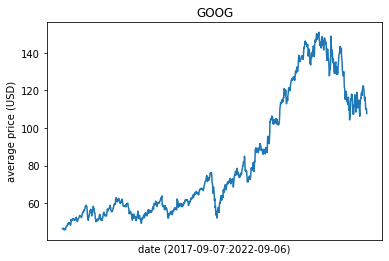

In [0]:
googAvgList = googAvg.collect()
plt.plot([row.date for row in googAvgList], [row.avgPrice for row in googAvgList])
plt.title('GOOG')
plt.ylabel('average price (USD)')
plt.xlabel(f"date ({getDateRange(googAvgList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

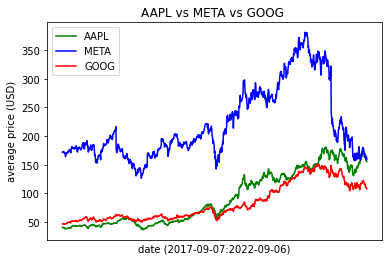

In [0]:
fig, ax = plt.subplots()
ax.plot([row.avgPrice for row in aaplAvgList], color = 'green', label = 'AAPL')
ax.plot([row.avgPrice for row in metaAvgList], color = 'blue', label = 'META')
ax.plot([row.avgPrice for row in googAvgList], color = 'red', label = 'GOOG')
ax.legend(loc = 'upper left')
plt.title('AAPL vs META vs GOOG ')
plt.ylabel('average price (USD)')
plt.xlabel(f"date ({getDateRange(googAvgList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

<strong>Question 3:</strong> Compare the weekly transaction volume of the 3 stocks and see how that fluctuate based on the Covid19 case weekly total.

In [0]:
from dateutil.parser import parse
from datetime import datetime

covidRddFmt = covidRdd.map(lambda values: [parse(values[1]).strftime("%Y-%m-%d"),values[2]])
covidDfFmt = covidRddFmt.toDF(['date', 'weeklyCases']).orderBy('date')
covidDfFmt.show()

+----------+-----------+
|      date|weeklyCases|
+----------+-----------+
|2020-01-29|          7|
|2020-02-05|         10|
|2020-02-12|         10|
|2020-02-19|         16|
|2020-02-26|         31|
|2020-03-04|        118|
|2020-03-11|       1226|
|2020-03-18|       8490|
|2020-03-25|      60921|
|2020-04-01|     159836|
|2020-04-08|     219999|
|2020-04-15|     206851|
|2020-04-22|     199566|
|2020-04-29|     196445|
|2020-05-06|     187822|
|2020-05-13|     159088|
|2020-05-20|     157615|
|2020-05-27|     145474|
|2020-06-03|     144648|
|2020-06-10|     142643|
+----------+-----------+
only showing top 20 rows



In [0]:
# cut down the dates on prices using covid df
volsDf = aaplMetaGoogSigDf.select(['date', 'aaplVolume', 'metaVolume', 'googVolume'])
volsDf = volsDf.withColumn("date", F.to_timestamp(F.col("date")))
volsDf = volsDf.select(F.date_format('date','yyyy-MM-dd').alias('date'), 'aaplVolume', 'metaVolume', 'googVolume')

volsCutDf = volsDf.filter(volsDf.date > covidDfFmt.first().date)
volsWeeklyDf = volsCutDf.withColumn("date",F.date_sub(F.next_day(F.col("date"),"wednesday"),7)).groupBy("date").agg(F.sum("aaplVolume").alias("aaplVolume"),F.sum("metaVolume").alias("metaVolume"),F.sum("googVolume").alias("googVolume")).orderBy("date")

covidVolsDf = volsWeeklyDf.alias("v").join(covidDfFmt, covidDfFmt.date == volsWeeklyDf.date).select(["v.*", covidDfFmt.weeklyCases]).orderBy("v.date")
covidVolsDf.show()

+----------+-----------+----------+----------+-----------+
|      date| aaplVolume|metaVolume|googVolume|weeklyCases|
+----------+-----------+----------+----------+-----------+
|2020-01-29| 6.367364E8|1.152599E8| 2.14528E8|          7|
|2020-02-05| 5.456084E8| 7.22354E7| 1.52048E8|         10|
|2020-02-12| 4.411228E8| 5.55612E7|  8.8312E7|         10|
|2020-02-19| 7.769728E8| 8.38502E7|  1.8246E8|         16|
|2020-02-26|1.6060432E9|1.237091E8| 2.76072E8|         31|
|2020-03-04|1.2049628E9|1.214223E8|  2.6224E8|        118|
|2020-03-11|1.6912844E9|1.720448E8| 3.72984E8|       1226|
|2020-03-18| 1.598068E9| 1.70255E8| 3.77498E8|       8490|
|2020-03-25|1.1248844E9|1.328125E8| 3.18444E8|      60921|
|2020-04-01|   8.7674E8|1.262427E8|  2.3349E8|     159836|
|2020-04-08| 6.567476E8| 8.55657E7| 1.67214E8|     219999|
|2020-04-15| 8.145364E8|1.029522E8| 1.99746E8|     206851|
|2020-04-22| 5.969304E8|1.343894E8| 1.97002E8|     199566|
|2020-04-29| 8.422808E8|1.629221E8|  2.3381E8|     19644

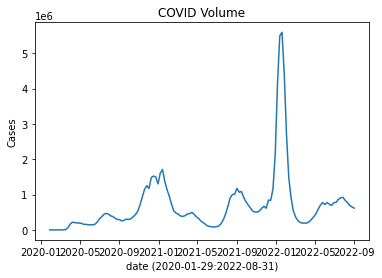

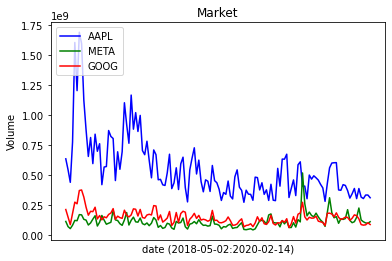

In [0]:
covidVolsList = covidVolsDf.collect()
plt.plot([row.date for row in covidVolsList], [int(row.weeklyCases) for row in covidVolsList])
plt.title('COVID Volume')
plt.ylabel('Cases')
plt.xlabel(f"date ({getDateRange(covidVolsList)})")
plt.show()

fig, ax = plt.subplots()
ax.plot([row.date for row in covidVolsList], [int(row.aaplVolume) for row in covidVolsList], color = 'blue', label = 'AAPL')
ax.plot([row.date for row in covidVolsList], [int(row.metaVolume) for row in covidVolsList], color = 'green', label = 'META')
ax.plot([row.date for row in covidVolsList], [int(row.googVolume) for row in covidVolsList], color = 'red', label = 'GOOG')
ax.legend(loc = 'upper left')
plt.title('Market')
plt.ylabel('Volume')
plt.xlabel(f"date ({getDateRange(aaplMetaGoogRobinList)})")
plt.tick_params(bottom=False, labelbottom=False)
plt.show()